In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


In [2]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\EastWestAirlines.csv")

In [3]:
df=pd.get_dummies(data=df,columns={"cc1_miles","cc2_miles","cc3_miles"},drop_first=True)

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm=norm_func(df.iloc[:,1:])

In [6]:
df_norm

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3995,0.037766,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.043169,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3997,0.032202,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x1d1bebe16d0>,
 <a list of 13 Text major ticklabel objects>)

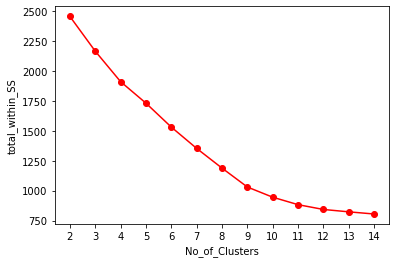

In [8]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
    

In [9]:
model=KMeans(n_clusters=5).fit(df_norm)

In [10]:
model.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [11]:
df["Clust"]=pd.Series(model.labels_)

In [12]:
df=df.iloc[:,[19,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]


In [13]:
df.iloc[:,1:].groupby(df.Clust).mean()


,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3
Clust,,,,,,,,,,,,,,,,,,
0,109616.278095,155.683810,40816.921905,19.628571,567.099048,1.693333,4730.670476,0.586667,0.003810,0.001905,0.001905,0.003810,0.000000,0.0,1.0,0.0,0.001905,0.000000
1,40783.364737,92.200000,3346.192632,6.511579,227.005263,0.660526,3625.851579,0.000000,0.000526,0.000000,0.000526,0.000526,0.094211,0.0,0.0,0.0,0.008421,0.004737
2,83529.153046,290.453195,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.000000,0.000000,0.001486,0.000000,0.001486,0.156018,0.0,0.0,0.0,0.014859,0.008915
3,84958.265905,111.389886,19944.921697,16.644372,320.564437,0.902121,4324.776509,0.463295,0.000000,0.000000,0.003263,0.000000,0.000000,1.0,0.0,0.0,0.001631,0.000000
4,177084.142361,193.204861,78448.045139,22.447917,767.201389,2.350694,5299.489583,0.750000,0.000000,0.006944,0.006944,0.003472,0.000000,0.0,0.0,1.0,0.000000,0.000000
